In [ ]:
from google.colab import files
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Dayoung (Jennie) Yoon:
# 1.   EDA
# 2.   Project Report
# 3.   Demo
# Mohidul Abedin:
# 1.   Modeling and Question Answering
# 2.   Project Report
# 3.   Demo


Part 1. EDA
Get familar with the dataset and decide what features and observations will be useful. Make good use of visualizations.
* Clean the dataset, remove the outliers, before any data merging and analysis. Explain what you did.
* What is the covid case trend in Germany, and how is it different from each state/county? Which state/county has the highest/lowest increasing rate?
* What is the covid death rate trend in Germany, and how is it different from each state/county? Which state/county has the highest/lowest increasing rate?
* Which age/gender group has the highest covid positive cases?
* Which age/gender group has the highest covid death cases?
* What contributes to the spreading of the covid cases in Germany? (Additional datasets probably will be helpful)






In [ ]:
# Import data files and Clean the dataset by droping duplicates and null values
data_covid = pd.read_csv('covid_de.csv')
data_demo = pd.read_csv('demographics_de.csv')

data_covid = data_covid.dropna()
data_demo = data_demo.dropna()
data_demo = data_demo.drop_duplicates()

In [ ]:
data_covid

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
691221,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1
691222,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1
691223,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1
691224,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0


In [ ]:
data_demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


In [ ]:
# Comparing to covid dataset, reformat the value of gender column in demographics data into M and F to match the format
data_demo['gender'] = data_demo['gender'].apply(lambda x: 'M' if x == 'male' else 'F')
data_demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,F,00-04,261674
1,Baden-Wuerttemberg,F,05-14,490822
2,Baden-Wuerttemberg,F,15-34,1293488
3,Baden-Wuerttemberg,F,35-59,1919649
4,Baden-Wuerttemberg,F,60-79,1182736
...,...,...,...,...
187,Thueringen,M,05-14,92545
188,Thueringen,M,15-34,214553
189,Thueringen,M,35-59,384822
190,Thueringen,M,60-79,264189


In [ ]:
# Data Merging: combine two datasets into one including the common columns of state, gender and age group
df = pd.merge(data_covid, data_demo, on= ['state', 'age_group', 'gender'], how = 'outer')
# Clean the new dataset once again after merging
df = df.drop_duplicates()
df = df.dropna()
df

,state,county,age_group,gender,date,cases,deaths,recovered,population
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,261674
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,261674
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,261674
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,261674
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,261674
...,...,...,...,...,...,...,...,...,...
675540,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1,57340
675541,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1,57340
675542,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1,57340
675543,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0,57340


<Axes: title={'center': 'COVID case trend in Germany'}, xlabel='date', ylabel='Total Cases'>

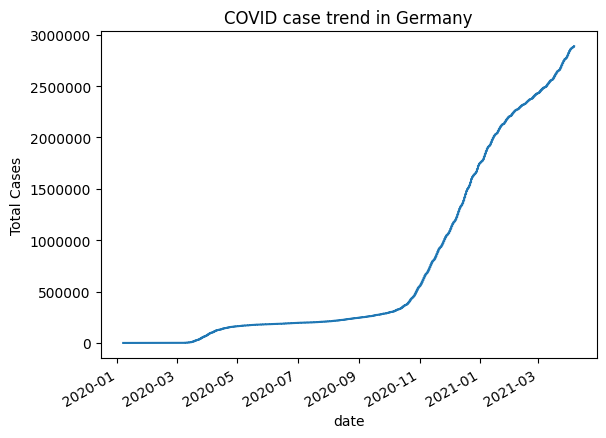

In [ ]:
# COVID case trend in Germany
df['date'] = pd.to_datetime(df['date'])
ordered_date = df.sort_values('date')

plt.ticklabel_format(style = 'plain', useOffset = False)
ordered_date.set_index('date')['cases'].cumsum().plot(title= "COVID case trend in Germany", ylabel = 'Total Cases')

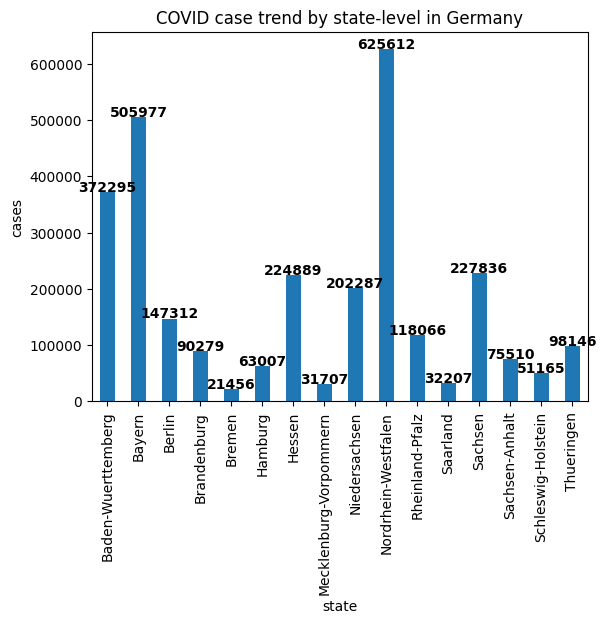

In [ ]:
# Observing COVID trend cases in state-level using bar-graph
# 1. Group the dataframe by state
# 2. Get the total number of covid cases in each state
level_state = df.groupby('state')['cases'].sum();
axis = level_state.plot.bar(ylabel = 'cases', title = 'COVID case trend by state-level in Germany')

# Add y values to the plot
for i, v in enumerate(level_state):
    plt.text(i, v+1000, str(v), ha='center', fontweight='bold')

plt.show()

From the above generated bar-graph, it shows that Nordrhein-Westfalen has the most Covid cases followed by Bayem and Baden-Wuerttemberg. On the other hand, states which had the lowest cases were Bremen, Mecklenburg-Vorpommem, and Saarland.

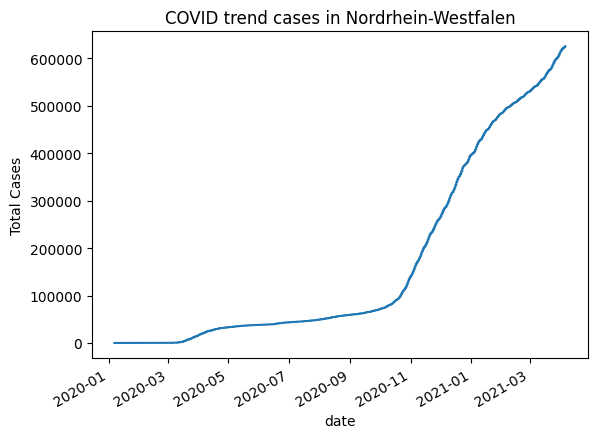

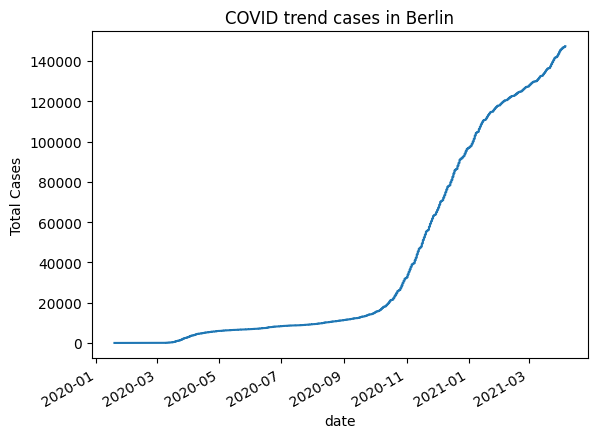

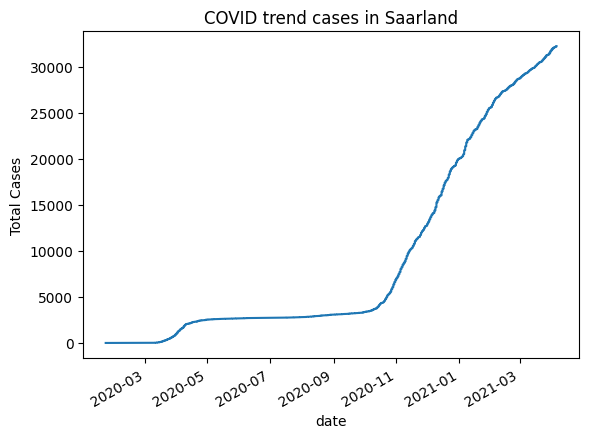

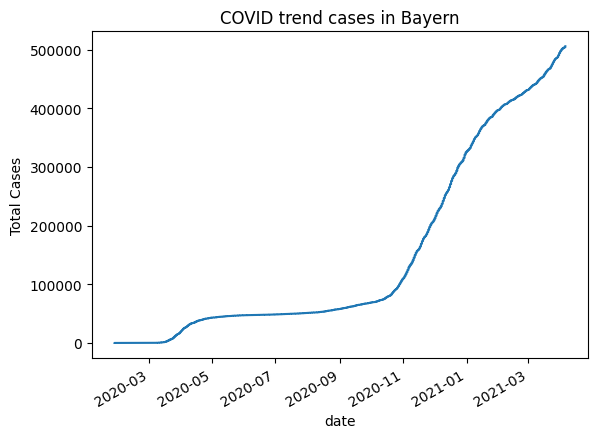

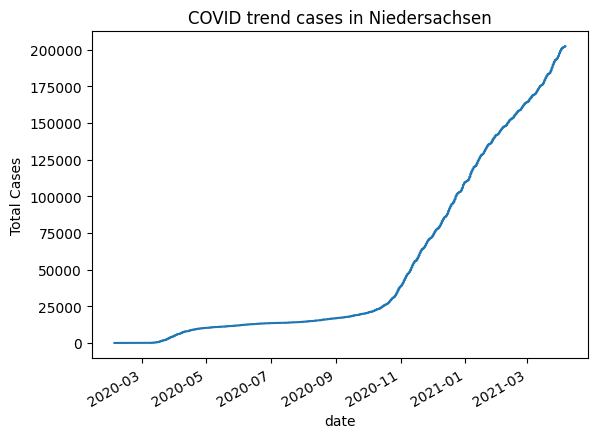

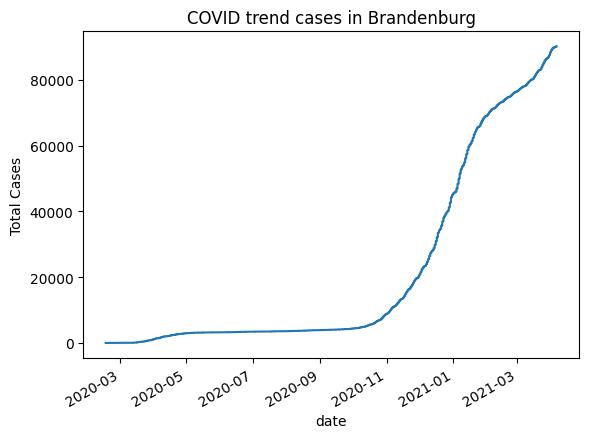

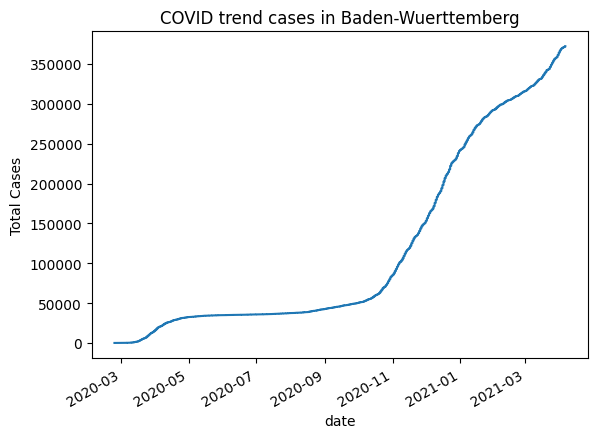

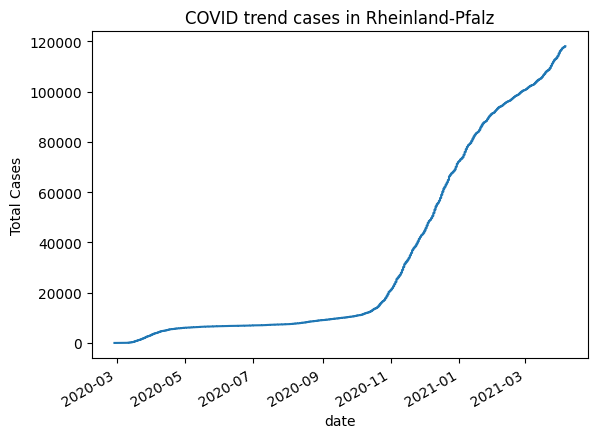

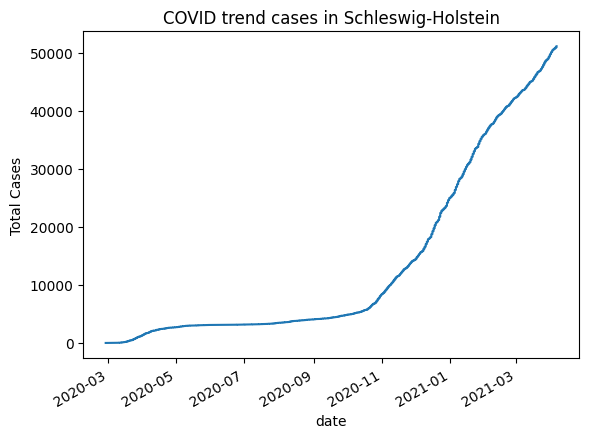

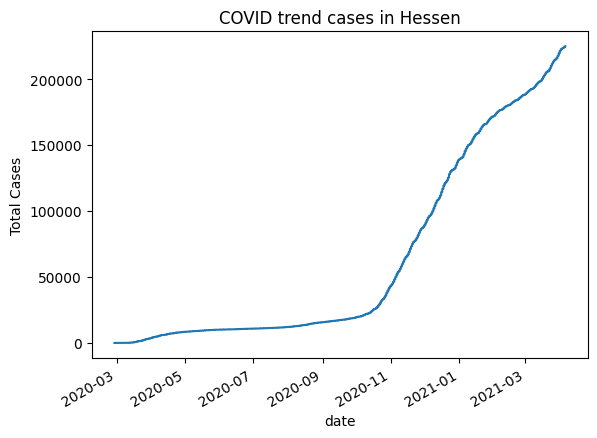

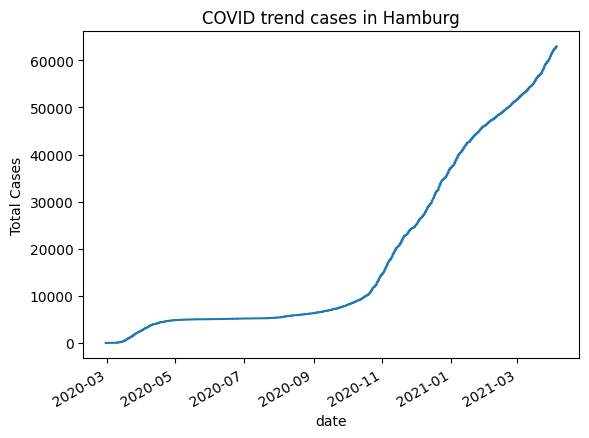

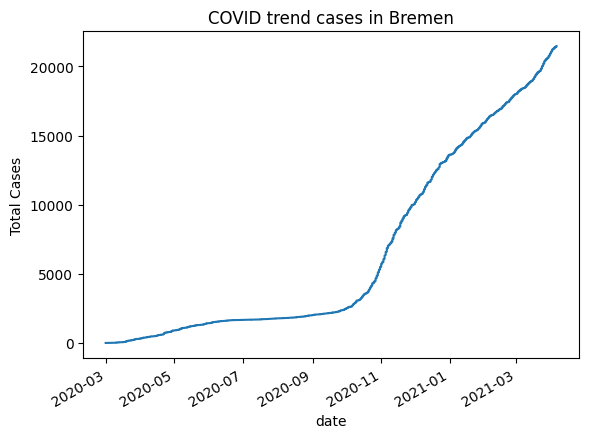

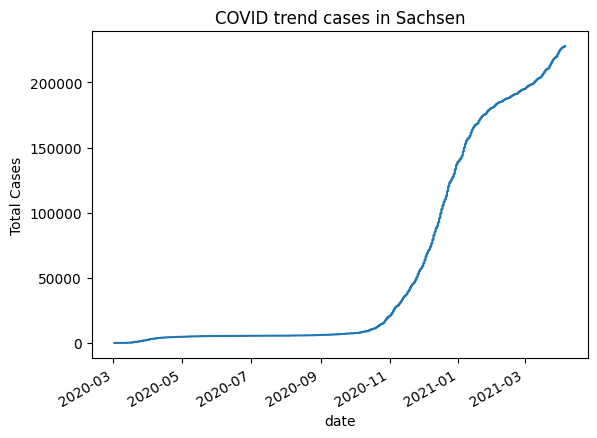

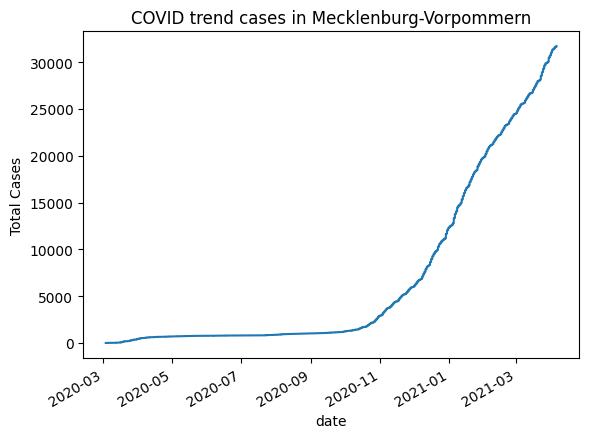

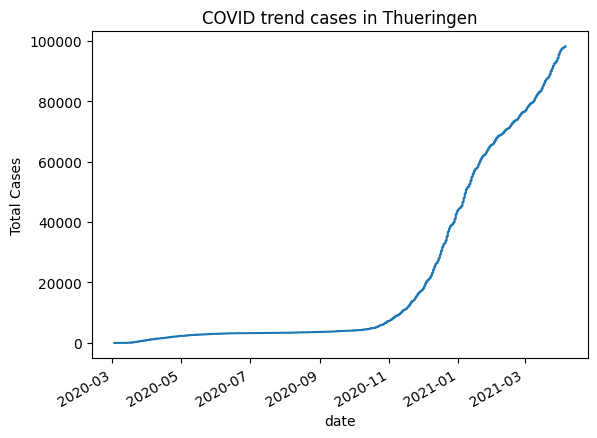

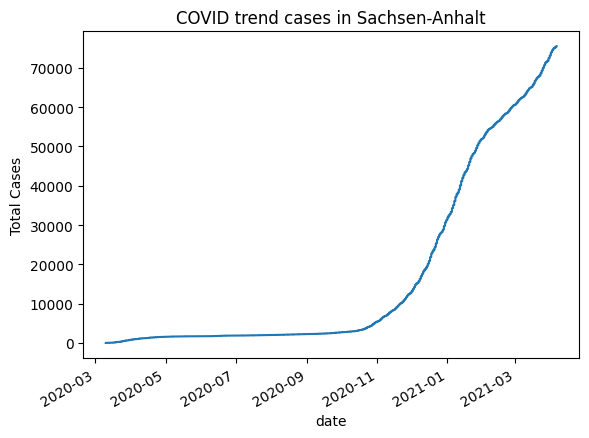

In [ ]:
# Observing COVID trend case for each states

for i in range(df['state'].unique().size):
  plt.figure()
  order_by_date = df.sort_values('date')
  state_level = order_by_date.loc[order_by_date['state'] == order_by_date['state'].unique()[i]]
  state_level.set_index('date')['cases'].cumsum().plot(title= str("COVID trend cases in " + order_by_date['state'].unique()[i]), ylabel = 'Total Cases')

From the above, we can find that each states commonly has a steep increase in COVID cases from 2020-11(2020 November), which leads to a continuous rise into 2021.

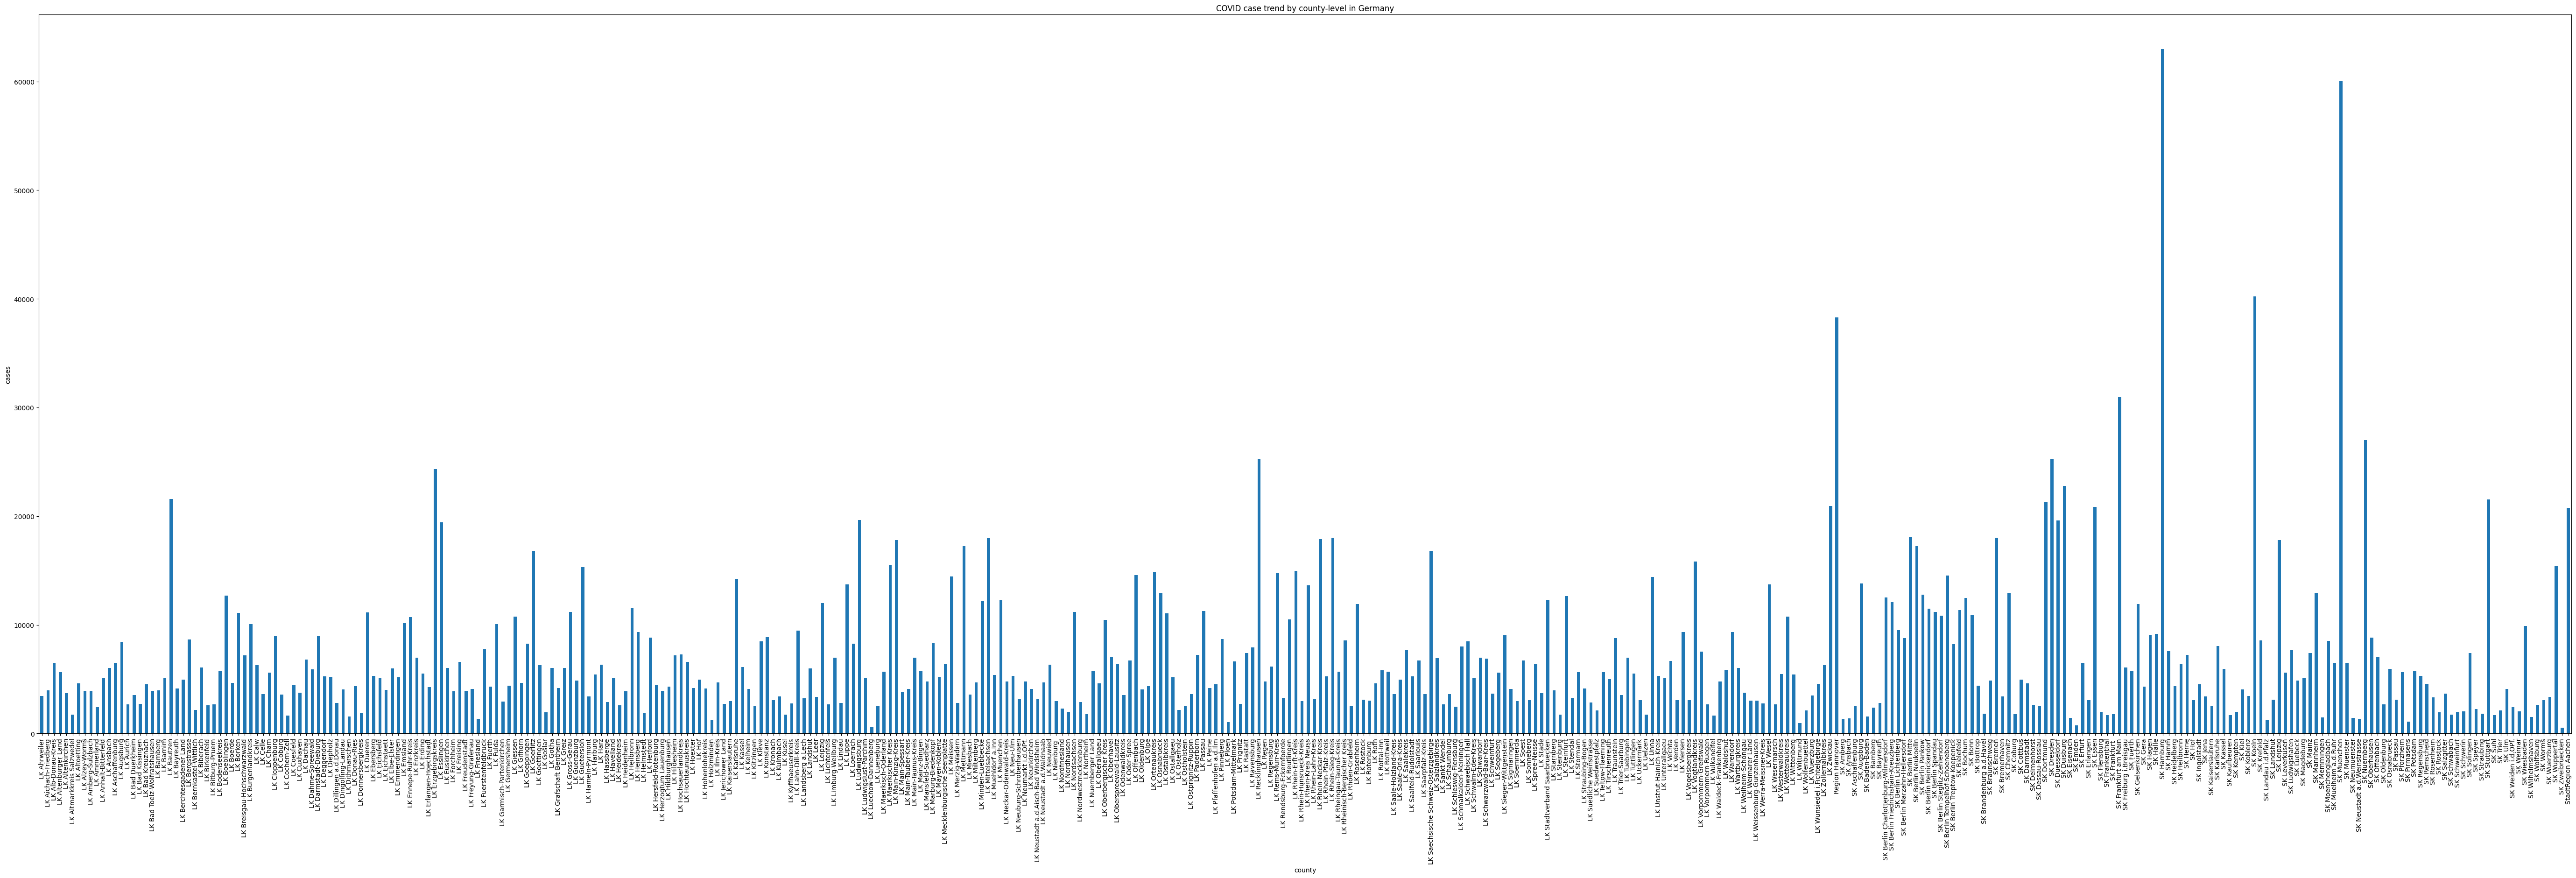

In [ ]:
# Observing COVID trend cases in county-level using bar-graph
# 1. Group the dataframe by county
# 2. Get the total number of covid cases in each county
level_county = df.groupby('county')['cases'].sum();
axis = level_county.plot.bar(ylabel = 'cases', title = 'COVID case trend by county-level in Germany', figsize=(70, 20))

In [ ]:
# Top 5 and bottom 5 counties for the number of COVID cases
sorted_county = df.groupby('county')['cases'].sum().sort_values(ascending = False)
sorted_county

county
SK Hamburg               63007
SK Muenchen              60024
SK Koeln                 40244
Region Hannover          38290
SK Frankfurt am Main     30926
                         ...  
LK Ploen                  1040
LK Wittmund                980
SK Emden                   755
LK Luechow-Dannenberg      588
SK Zweibruecken            545
Name: cases, Length: 412, dtype: int64

From the above table, it shows that SK Hamburg, SK Muenchen, SK Koeln has the top 3 COVID cases in order. On the other hand, LK Ploen, LK Wittmund, SK Emden has the bottom 3 cases in Germany as county-level.

**Observing on COVID death rates**

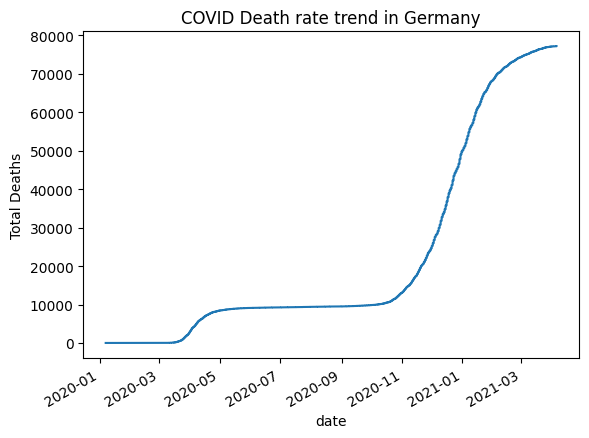

In [ ]:
# Observing COVID Death rate trend
ordered_by_date = df.sort_values('date')
plt.ticklabel_format(style = 'plain', useOffset= False)
ordered_by_date.set_index('date')['deaths'].cumsum().plot(title= "COVID Death rate trend in Germany", ylabel = "Total Deaths");

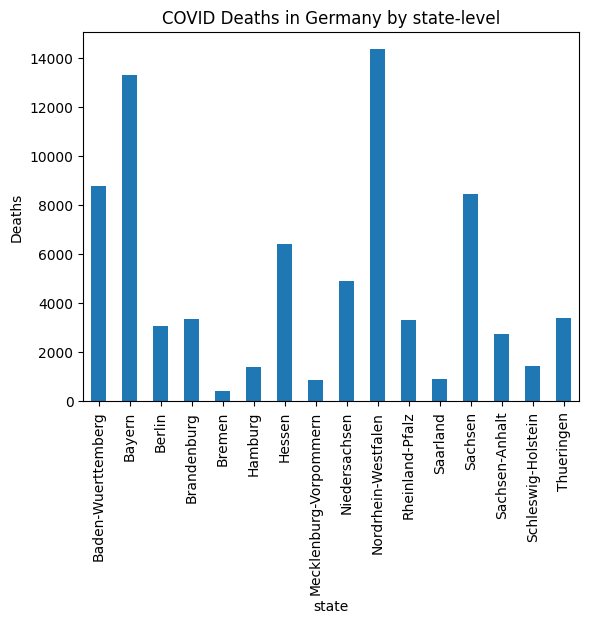

In [ ]:
# COVID Deaths in Germany by state-level
death_level_state = df.groupby('state')['deaths'].sum();
axis = death_level_state.plot.bar(ylabel = 'Deaths', title = 'COVID Deaths in Germany by state-level')

From the above generated bar-graph, it shows that Nordrhein-Westfalen has the most Covid cases followed by Bayem and Baden-Wuerttemberg which shows the same as the Covid Trend cases. On the other hand, states which had the lowest cases were Bremen, Mecklenburg-Vorpommem, and Saarland.

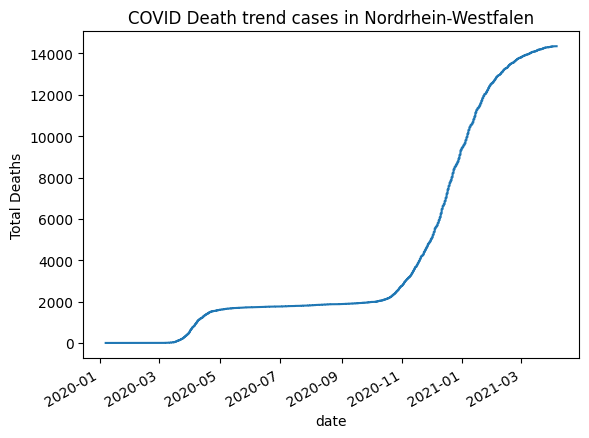

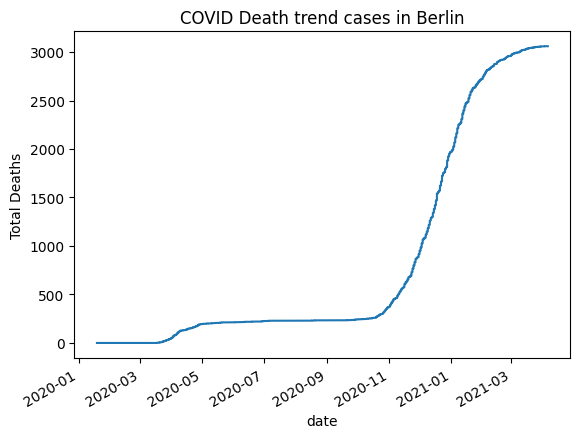

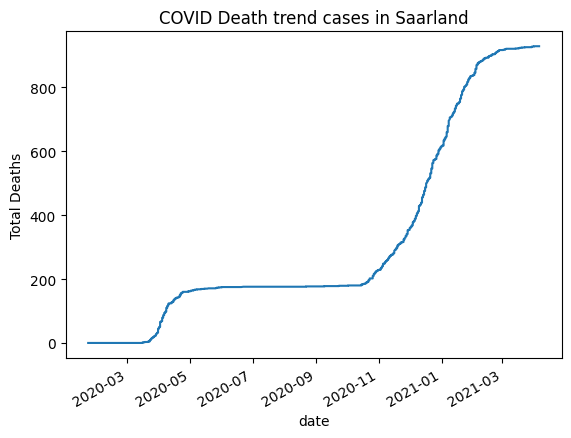

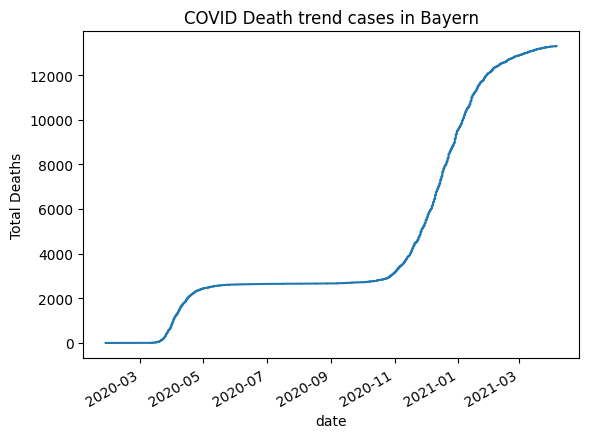

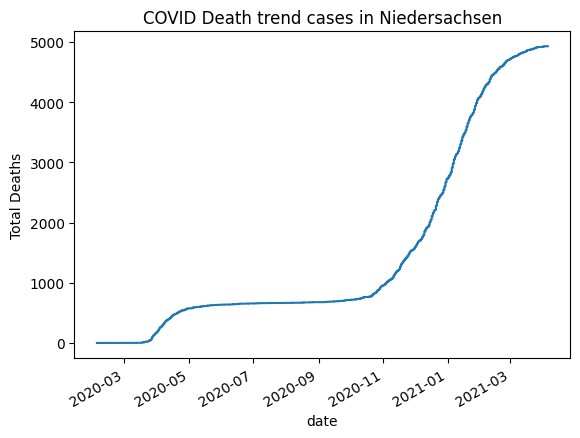

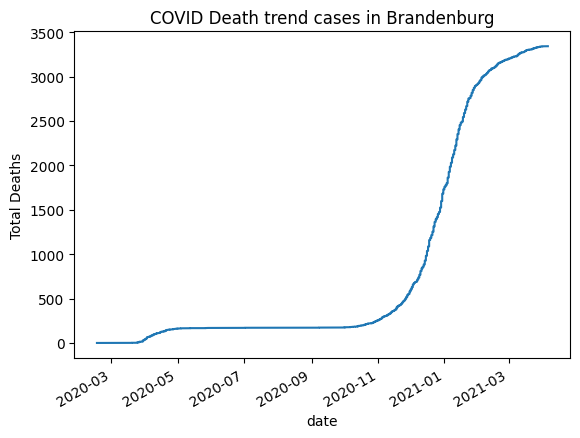

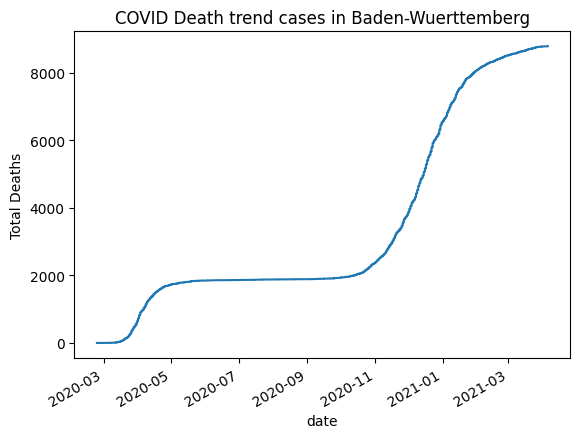

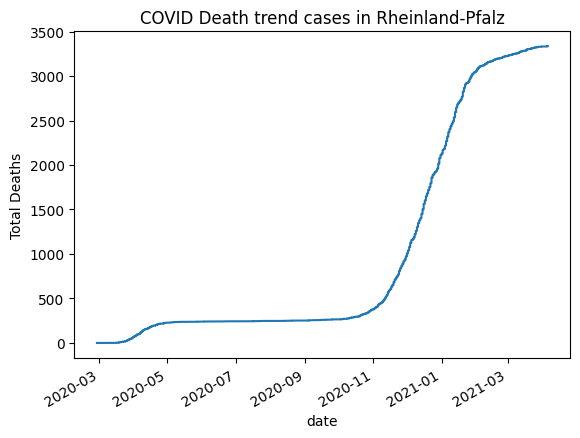

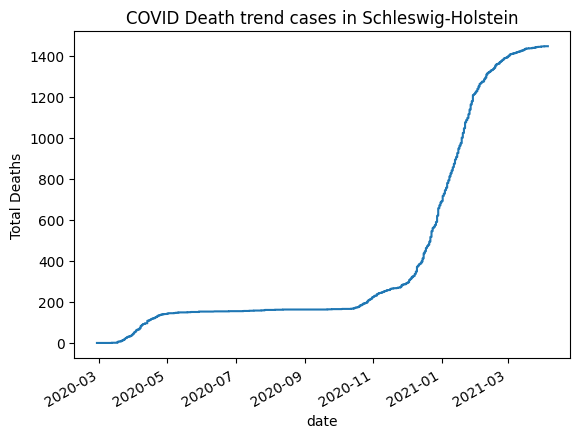

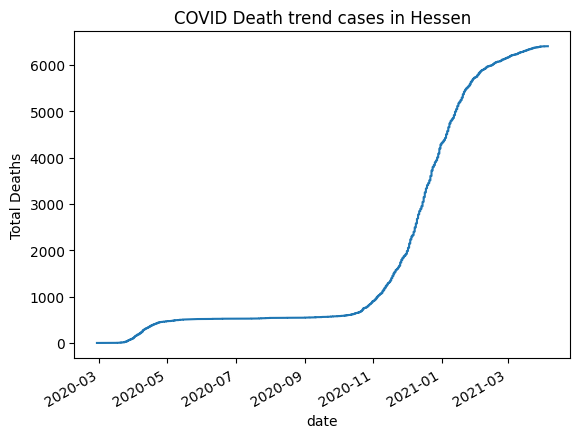

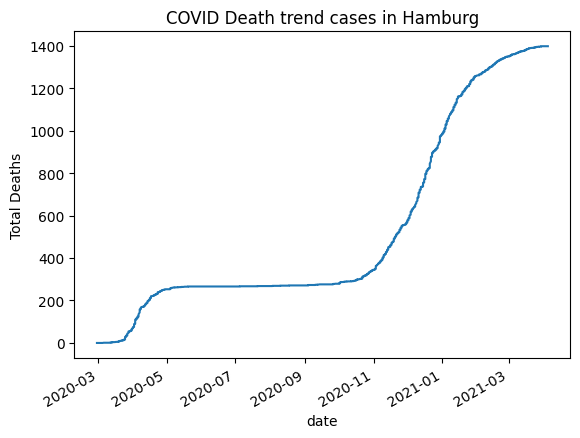

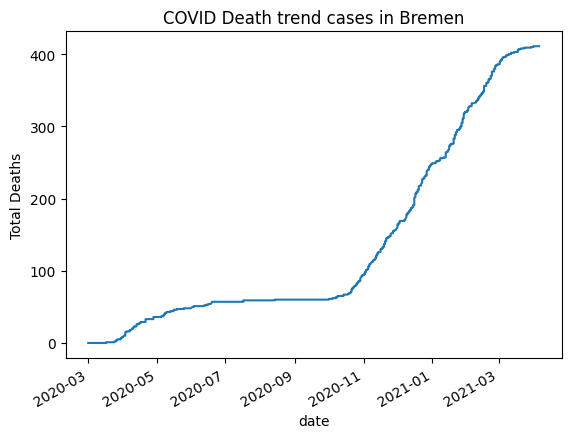

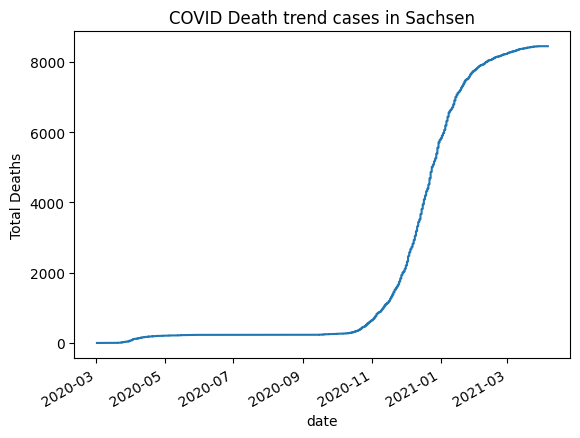

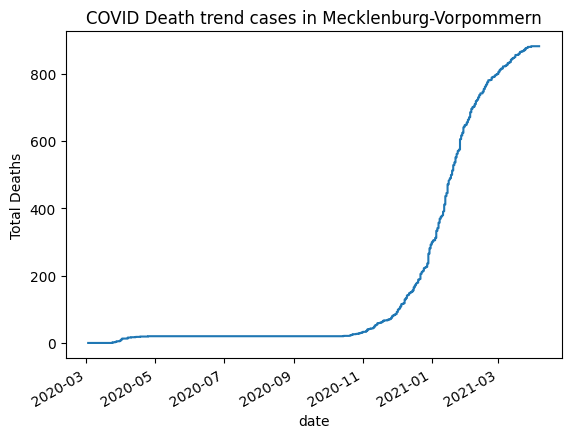

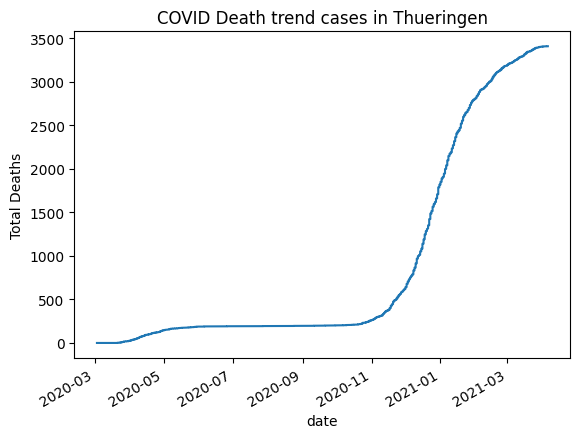

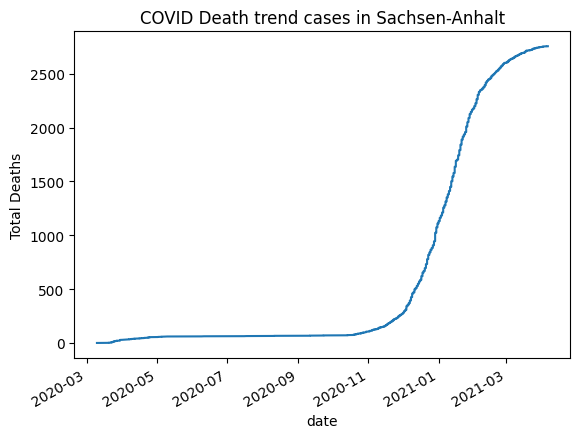

In [ ]:
# Observing COVID death trend for each states
for i in range(df['state'].unique().size):
  plt.figure()
  order_by_date = df.sort_values('date')
  state_level = order_by_date.loc[order_by_date['state'] == order_by_date['state'].unique()[i]]
  state_level.set_index('date')['deaths'].cumsum().plot(title= str("COVID Death trend cases in " + order_by_date['state'].unique()[i]), ylabel = 'Total Deaths')


From the above, we can find that each states commonly has a steep increase in COVID death rate from 2020-11(2020 November), which leads to a continuous rise into 2021. This is similar to the previous covid case trends.

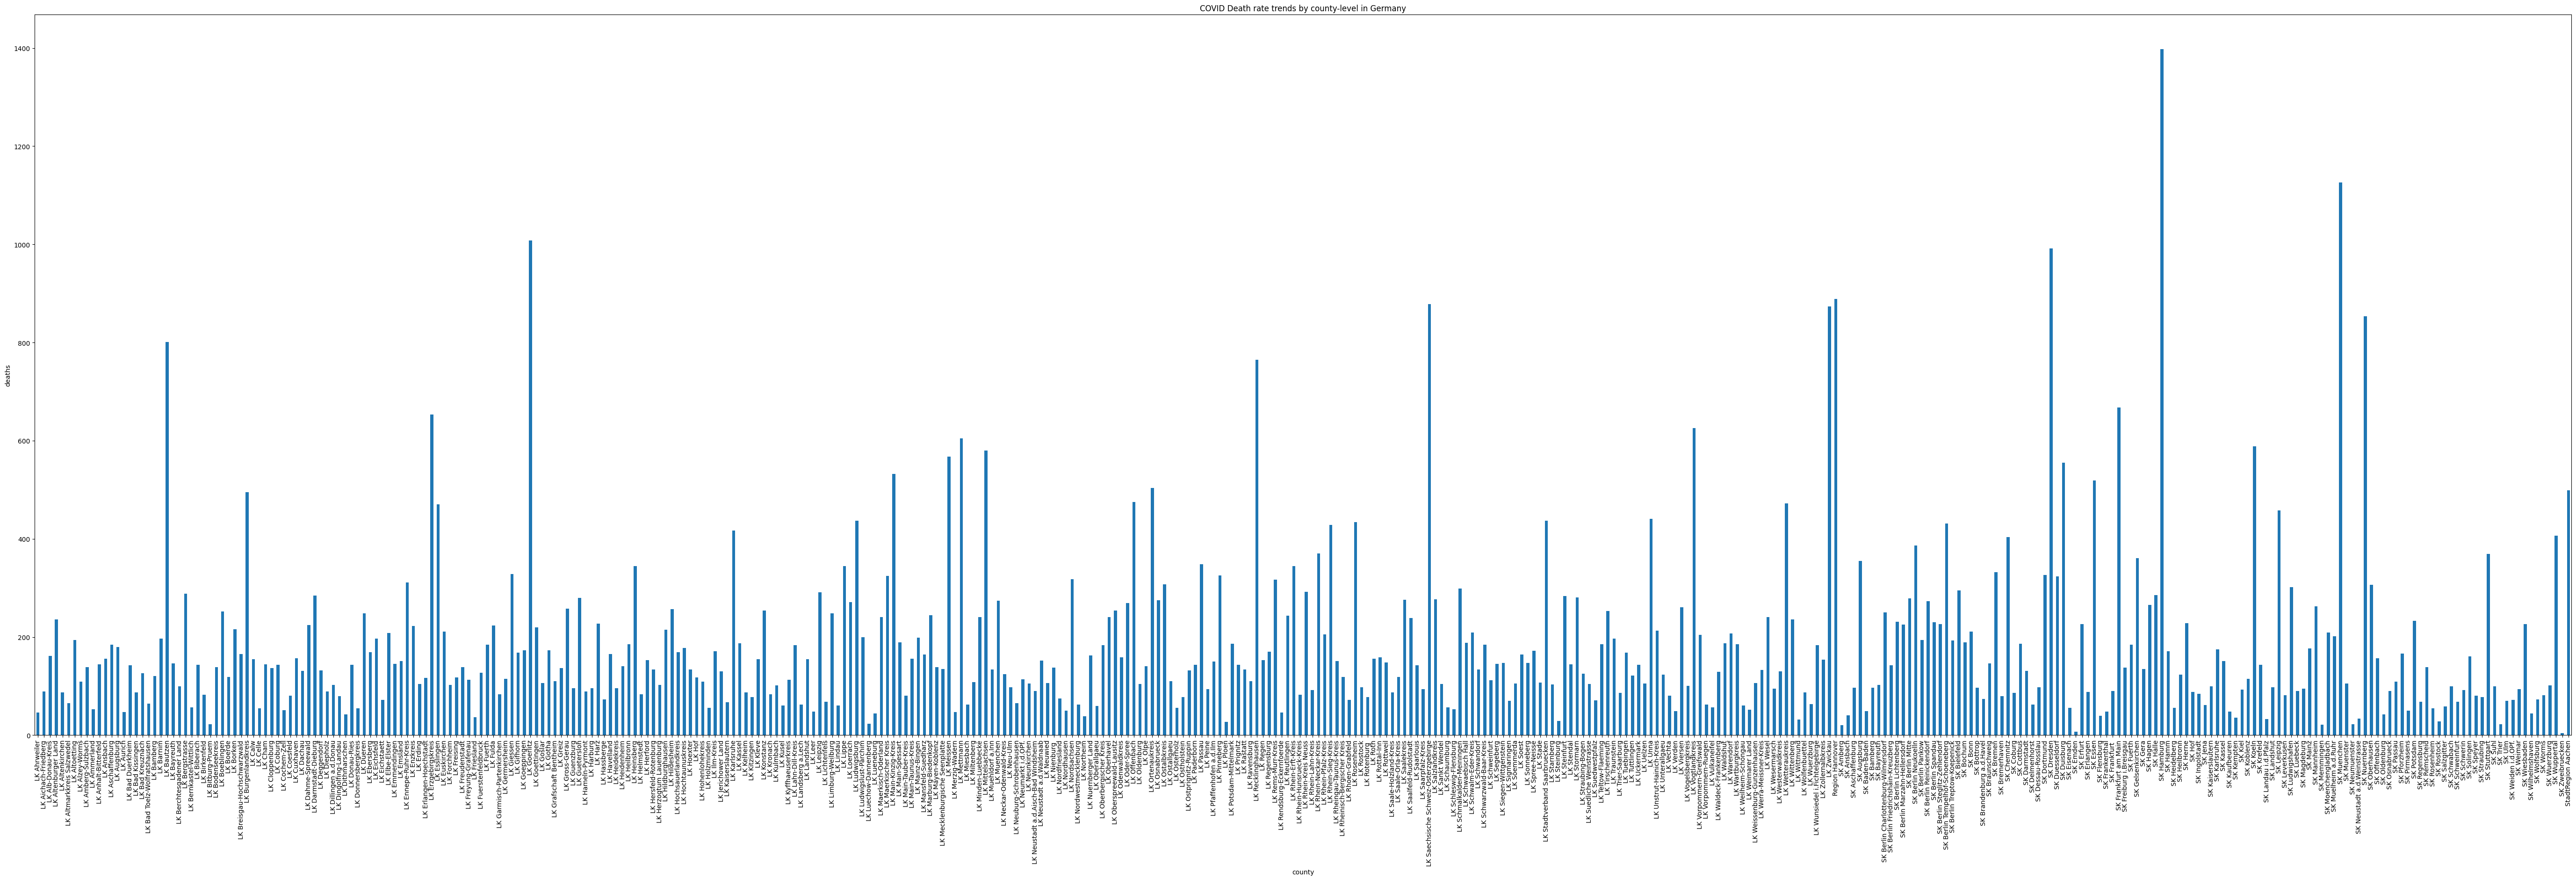

In [ ]:
# Observing COVID death rate trends in county-level by using bar-graph
# 1. Group the dataframe by county
# 2. Get the total number of covid death rate trends for each county
level_county = df.groupby('county')['deaths'].sum()
axis = level_county.plot.bar(ylabel = 'deaths', title = 'COVID Death rate trends by county-level in Germany', figsize=(70, 20))

In [ ]:
# Top 5 and bottom 5 counties for the number of COVID cases
sorted_county = df.groupby('county')['deaths'].sum().sort_values(ascending = False)
sorted_county

county
SK Hamburg         1398
SK Muenchen        1126
LK Goerlitz        1008
SK Dresden          992
Region Hannover     889
                   ... 
SK Neumuenster       22
SK Memmingen         21
SK Amberg            20
SK Emden              7
SK Zweibruecken       4
Name: deaths, Length: 412, dtype: int64

From the above table, it shows that SK Hamburg, SK Muenchen, LK Goerlitz has the top 3 COVID death rates in order. On the other hand, SK Neumuenster, SK Memmingen, and SK Amberg has the bottom 3 death rates in Germany as county-level.

**Observation of Age/Gender group**

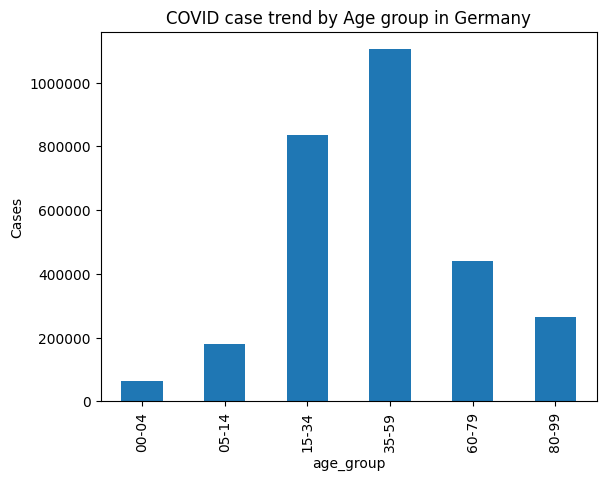

In [ ]:
# Observing which age group has the highest covid positive cases
level_age = df.groupby('age_group')['cases'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
axis = level_age.plot.bar(ylabel = 'Cases', title = 'COVID case trend by Age group in Germany')

From the above, it shows that the age group of 35-59 had the most COVID cases in Germany. On the other hand, the age group of 00-04 were least likely to be affected.

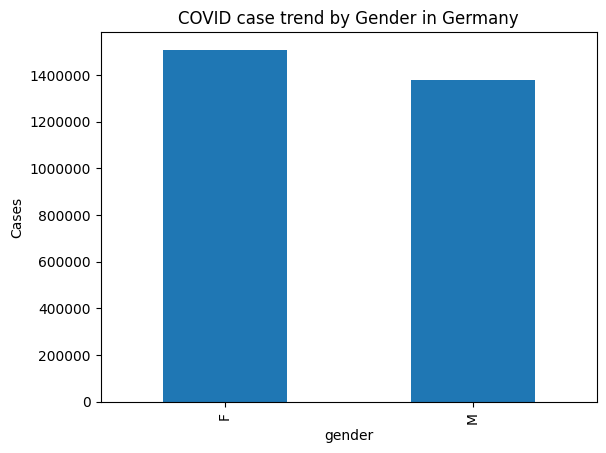

In [ ]:
# Observing which gender has the highest covid positive cases
level_gender = df.groupby('gender')['cases'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
axis = level_gender.plot.bar(ylabel = 'Cases', title = 'COVID case trend by Gender in Germany')

From above, it shows that female and male group shows the similar trend even though the female group had higher COVID case trends.

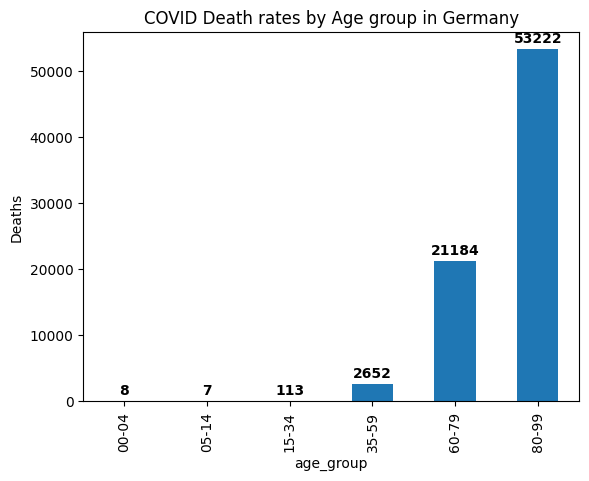

In [ ]:
# Observing which age group has the highest covid death rates
level_age = df.groupby('age_group')['deaths'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
axis = level_age.plot.bar(ylabel = 'Deaths', title = 'COVID Death rates by Age group in Germany')

# Add y values to the plot
for i, v in enumerate(level_age):
    plt.text(i, v+1000, str(v), ha='center', fontweight='bold')

plt.show()

From the above, it shows that older age groups had higher COVID death rates. The age group of 80-99 has the most highest death rate which is the group of oldest. This makes sense, considering that older population are susceptible to diseases.

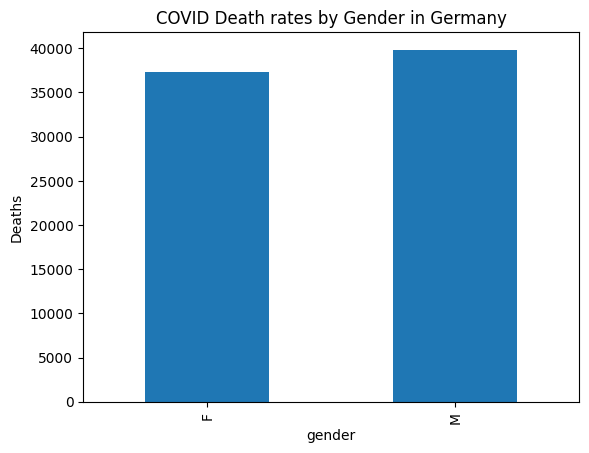

In [ ]:
# Observing which gender has the highest covid death rates
level_gender = df.groupby('gender')['deaths'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
axis = level_gender.plot.bar(ylabel = 'Deaths', title = 'COVID Death rates by Gender in Germany')

# # Add y values to the plot
# for i, v in enumerate(level_age):
#     plt.text(i, v+1000, str(v), ha='center', fontweight='bold')

# plt.show()

From the above, it shows that even though females had more COVID cases than males which was shown at previous graph, that males had more death rates compared to females.

Modeling and Question Answering (10 points):
Apply three machine learning algorithms to explore whether it is possible to predict whether the
covid patient would survive . Train your models on the training set, and make predictions for the
test set with the “death” column dropped. Evaluate the accuracy of your predictions. If your
predictions are not very accurate, what do you think is the reason? Use other evaluation metrics
to evaluate your models (Precision, Recall, F-score). Split the data further to include a cross
validation set. Did this improve your model’s performance on the test set?


In [ ]:
# The three models we are gonna use is logistic regression, linear regression and Random Forest Classifier
df

,state,county,age_group,gender,date,cases,deaths,recovered,population
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,261674
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,261674
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,261674
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,261674
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,261674
...,...,...,...,...,...,...,...,...,...
675540,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1,57340
675541,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1,57340
675542,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1,57340
675543,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0,57340


First we will use Logistic Regression to predict deaths usings gender and age group. We seperate gender into binary form (1 for male, 0 for female) and age groups (older age groups (60+) or children(0-4) as 1 and rest 0). We use then use accuracy, precision, recall and F1 score to determine how good the model is.

In [ ]:
df['gender'] = np.where(df['gender'] == 'M', 1, 0) #convert M to 1 and F to 0, so that they're binary values that can be processed
#convert anyone below the age of 5 and anyone above the age of 60 to 1 and the rest to 0
# we use the fact that older people and younger kids are moer susceptible to covid
df['age_group'] = np.where(df['age_group'].isin(["60-79", "80-99", "0-4"]), 1, 0)
x = df[['gender', 'age_group']] #choosing age_group and gender as classification variables
y = np.where(df['recovered'] == df['cases'], 1, 0) #if the amount of cases is equal to recovered then they all recovered
print(y)

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.30)

logReg = LogisticRegression()
logReg.fit(train_X, train_y)
predY = logReg.predict(test_X) #get and save predicted vals

# Evaluate the model using Accuracy, Precision, Recall, F1 Score
accuracy = metrics.accuracy_score(test_y, predY)
precision = metrics.precision_score(test_y, predY)
recall = metrics.recall_score(test_y, predY)
f1_score = metrics.f1_score(test_y, predY)

print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1_score))



[1 1 1 ... 1 0 0]
Accuracy: 0.84310
Precision: 0.84310
Recall: 1.00000
F1 Score: 0.91487


In [ ]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(logReg, x, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation accuracy: {:.5f}".format(mean_cv_score))

Mean cross-validation accuracy: 0.84276


Next we will use Radom Forest Classifier to predict deaths usings gender and age group.

In [ ]:
# Select features and target variable
x = df[['gender', 'age_group']]
y = np.where(df['recovered'] == df['cases'], 1, 0)

# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.30)

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf_clf.fit(train_X, train_y)

# Make predictions on the test data
predY_rf = rf_clf.predict(test_X)

# Evaluate the model using Accuracy, Precision, Recall, F1 Score
accuracy = metrics.accuracy_score(test_y, predY_rf)
precision = metrics.precision_score(test_y, predY_rf)
recall = metrics.recall_score(test_y, predY_rf)
f1_score = metrics.f1_score(test_y, predY_rf)

print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1_score))


Accuracy: 0.84216
Precision: 0.84216
Recall: 1.00000
F1 Score: 0.91432


In [ ]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, x, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation accuracy: {:.5f}".format(mean_cv_score))

Mean cross-validation accuracy: 0.84276


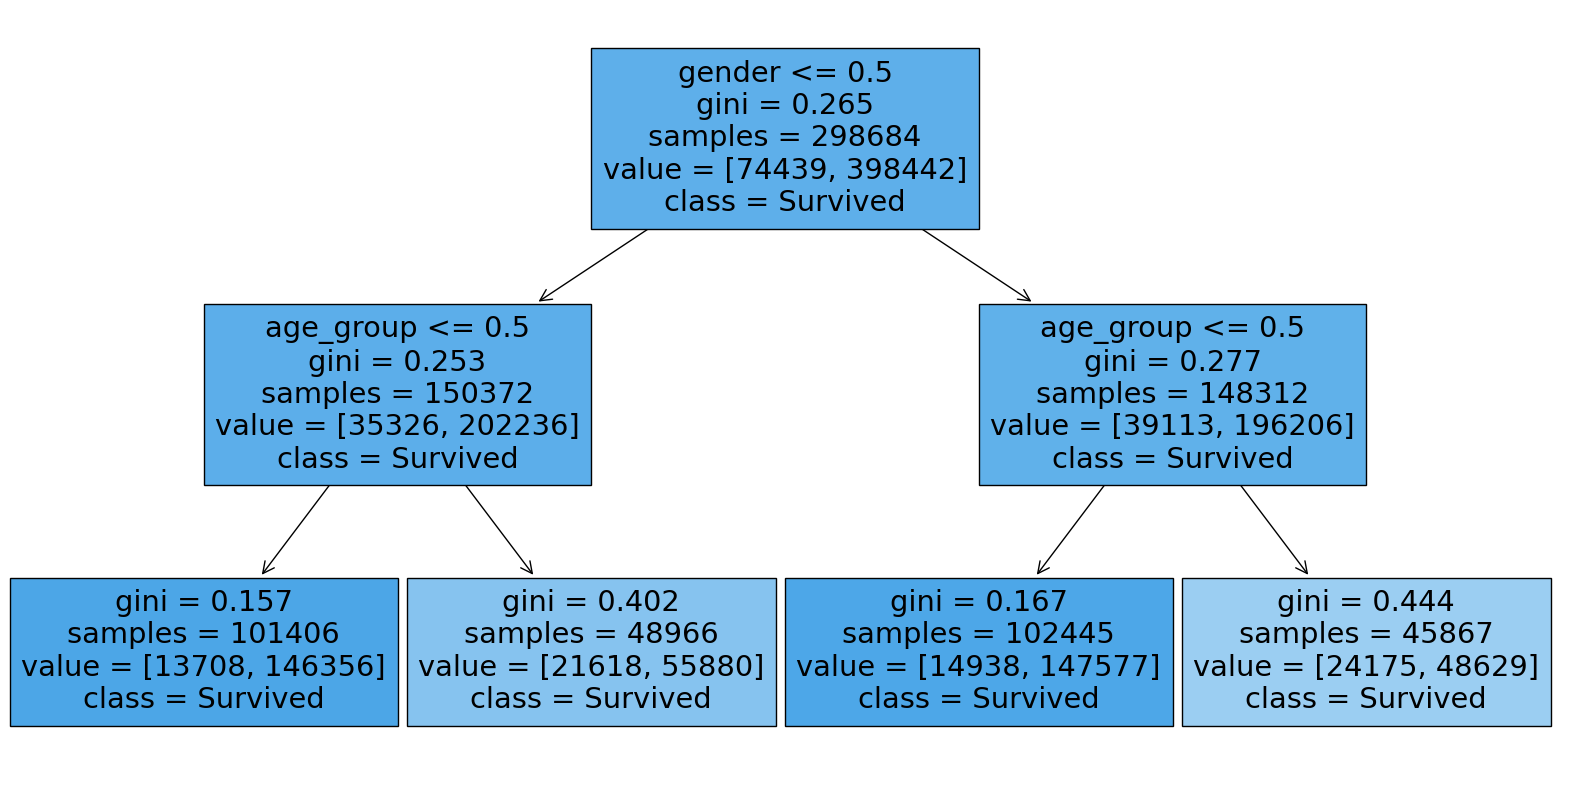

In [ ]:

# Select one of the trees (e.g., the first one) from the random forest
one_tree = rf_clf.estimators_[0]

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(one_tree, filled=True, feature_names=['gender', 'age_group'], class_names=['Not Survived', 'Survived'])

# Show the plot
plt.show()


**Here is an explanation of the top node of the tree**

age_group <= .5: This is the condition at the decision node. If a person's age_group feature is less than or equal to 0.5 (i.e., they do not belong to the age group "60-79", "80-99", or "0-4"), the tree will follow the left child node. Otherwise, it will follow the right child node.

gini = .264: The Gini impurity at this node is 0.264. Gini impurity measures the impurity of the samples at this node, with 0 being completely pure (all samples belong to a single class) and 1 being completely impure (samples evenly distributed across all classes). A lower Gini impurity indicates that the majority of the samples at this node belong to one class.

samples = 298612: There are 298,612 samples at this node, which means 298,612 samples in the training dataset reached this decision point.

value = [74154, 398727]: This shows the distribution of samples across the two classes at this node. There are 74,154 samples belonging to class 0 (not recovered) and 398,727 samples belonging to class 1 (recovered).

class = survived: This indicates the majority class at this node. In this case, the majority of the samples are classified as "recovered."



Both the Logistic Regression and Random Forest Classifier give a high F1 score and Accuracy/Precision. This shows that the model was very good at determining whether a patient was going to recover or not.

Here we use linear regression to see if the population had any relation to the rate of recovery for covid patients.

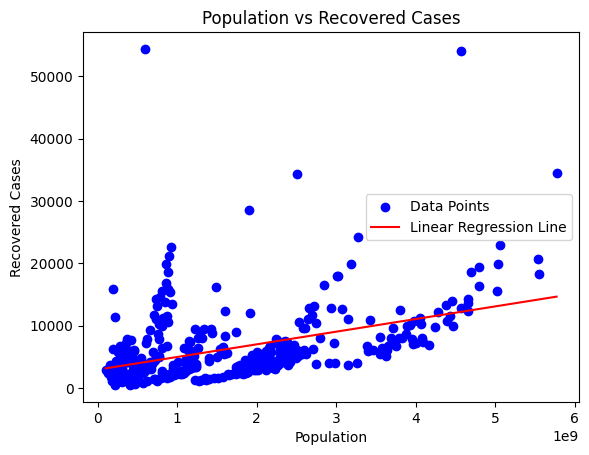

R-squared score: 0.18363


In [ ]:
x = np.array(df.groupby('county')['population'].sum()).reshape(-1,1) #total population by county
y = np.array(df.groupby('county')['recovered'].sum()).reshape(-1,1) #total number of recovered cases by county

lin_reg = LinearRegression()
lin_reg.fit(x,y)

test_x = np.linspace(min(x), max(x)).reshape(-1,1)
pred_y = lin_reg.predict(test_x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(test_x, pred_y, color='red', label='Linear Regression Line')

# Set the labels and title
plt.xlabel('Population')
plt.ylabel('Recovered Cases')
plt.title('Population vs Recovered Cases')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Calculate R-squared score
r_squared = lin_reg.score(x, y)
print("R-squared score: {:.5f}".format(r_squared))

A low R-squared score suggests that the model does not fit the data very well, and the population alone may not be a good predictor for the number of recovered cases. There could be other factors that contribute to the number of recovered cases that are not captured by the population variable.
Furthermore from the graph we can see that the data points don't really follow a linear pattern, which further suggests that a linear regression model is not the right move for this data set.